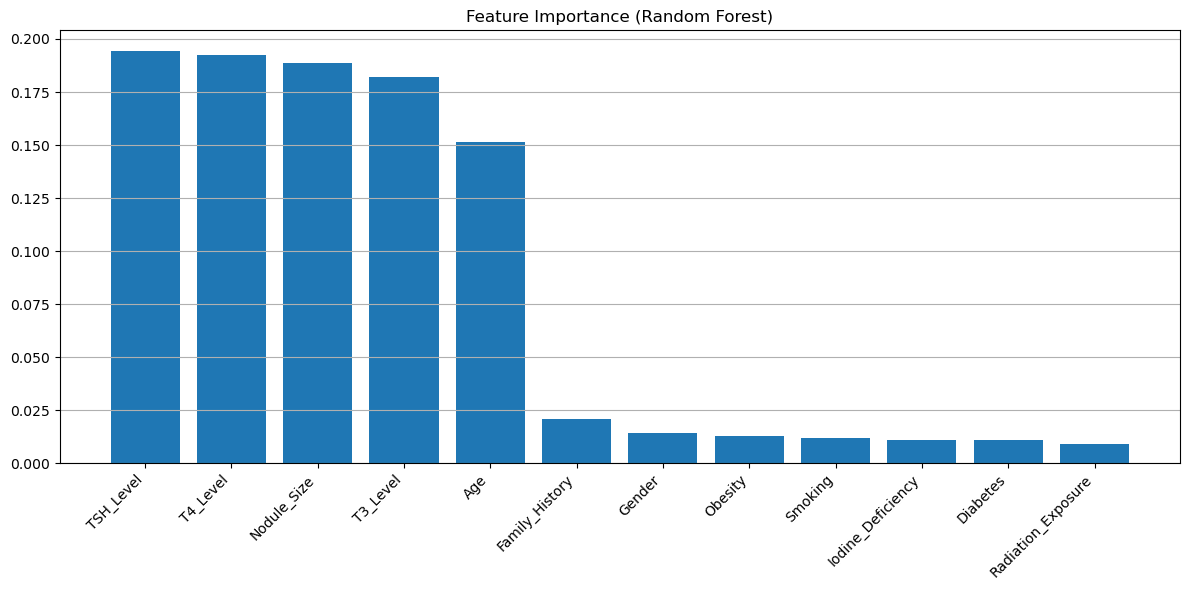

              Feature  Importance
8           TSH_Level    0.194366
10           T4_Level    0.192636
11        Nodule_Size    0.188857
9            T3_Level    0.182132
0                 Age    0.151437
2      Family_History    0.020580
1              Gender    0.014202
6             Obesity    0.012926
5             Smoking    0.011876
4   Iodine_Deficiency    0.011099


In [2]:
#Feature Importance - Random Forest
import pandas as pd #Εισαγωγή Pandas ως κύρια βιβλιοθήκη για διαχείριση/ανάλυση πινάκων δεδομένων (DataFrames)
import matplotlib.pyplot as plt  #Εισαγωγή matplotlib για γραφική απεικόνιση αποτελεσμάτων.
from sklearn.ensemble import RandomForestClassifier #Εισαγωγή RandomForestClassifier για ταξινόμηση & εκτίμηση σημαντικότητας χαρακτηριστικών.
from sklearn.preprocessing import StandardScaler  #Εισαγωγή StandardScaler για κανονικοποίηση χαρακτηριστικών (προαιρετικά).

# Βήμα 1: Φόρτωση του dataset
df = pd.read_excel("Dataset_Cleaned.xlsx")  #Φόρτωση επιμελημένου αρχείου δεδομένων (μετά τον καθαρισμό) από Excel.
df = df.drop(columns=["Thyroid_Cancer_Risk"]) #Διαγραφή του πεδίου Thyroid_Cancer_Risk λογω classification 

# Βήμα 2: Διαχωρισμός χαρακτηριστικών και στόχου θέτοντας το πεδίο diagnosis ως πεδίο-στόχο. 
X = df.drop(columns=["Diagnosis"]) #Ορισμός μεταβλητών εισόδου (X), όλες οι στήλες εκτός της Diagnosis.
y = df["Diagnosis"] # Ορισμός του Diagnosis ως το πεδίο-στόχος (y).
 
# Βήμα 3: Κανονικοποίηση (Προαιρετική για τον Random Forest)
scaler = StandardScaler() #Ορισμός αντικειμένου που φιλοξενει τον αλγόριθμο που κάνει random forest 
X_scaled = scaler.fit_transform(X) #Αξιολόγηση όλων των παραγόντων του πεδίου στόχου για κατανομή με βάση την σημαντικότητα.

# Βήμα 4: Εκπαίδευση μοντέλου Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Αρχικοποίηση μοντέλου Random Forest με 100 δέντρα και σταθερό seed.
rf.fit(X_scaled, y) # Εκπαίδευση του Random Forest με τα δεδομένα εισόδου και στόχου.

# Βήμα 5: Εξαγωγή σημαντικότητας χαρακτηριστικών
importances = rf.feature_importances_ # Εξαγωγή βαθμών σημαντικότητας χαρακτηριστικών βάσει μέσης μείωσης ακαθαρσίας (Gini).
feature_names = X.columns # Ανάκτηση ονομάτων χαρακτηριστικών για ερμηνεία.

# Δημιουργία DataFrame με χαρακτηριστικά και σημαντικότητες.
importance_df = pd.DataFrame({    
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False) # Ταξινόμηση χαρακτηριστικών κατά φθίνουσα σειρά σημαντικότητας.

# Βήμα 6: Οπτικοποίηση μέσω της import matplotlib.pyplot 
plt.figure(figsize=(12, 6))  # Δημιουργία καμβά γραφήματος με διαστάσεις 12x6.
plt.bar(importance_df["Feature"], importance_df["Importance"]) # Σχεδίαση ράβδο-διαγράμματος σημαντικότητας.
plt.xticks(rotation=45, ha="right")  # Περιστροφή ετικετών άξονα x για ευαναγνωσία.
plt.title("Feature Importance (Random Forest)")  # Προσθήκη τίτλου γραφήματος.
plt.tight_layout()  # Βελτιστοποίηση διάταξης για αποφυγή επικαλύψεων.
plt.grid(axis="y")  # Ενεργοποίηση οριζόντιου πλέγματος για διευκόλυνση σύγκρισης.
plt.show() # Εμφάνιση γραφήματος.
 
# Εκτύπωση των top 10 χαρακτηριστικών.
print(importance_df.head(10))


### Feature Importance – Random Forest Classifier
 
Στο παρακάτω διάγραμμα παρουσιάζεται η **σχετική σημασία (importance)** των χαρακτηριστικών ως προς την πρόγνωση καρκίνου του θυρεοειδούς, με βάση την εκπαίδευση ενός **Random Forest Classifier**:
 
 
#### Παρατηρήσεις:
- Τα 5 πιο σημαντικά χαρακτηριστικά είναι:
  1. **TSH_Level** (0.194)
  2. **T4_Level** (0.193)
  3. **Nodule_Size** (0.189)
  4. **T3_Level** (0.181)
  5. **Age** (0.151)
 
- Αυτά τα χαρακτηριστικά φαίνεται να έχουν τη μεγαλύτερη προγνωστική ισχύ για το τελικό αποτέλεσμα (διάγνωση καρκίνου).
 
- Χαμηλότερη σημασία έχουν μεταβλητές όπως:
  - **Family_History** (0.021)
  - **Gender**, **Obesity**, **Smoking**
  - **Iodine_Deficiency**, **Diabetes**, **Radiation_Exposure**
 
#### Συμπέρασμα:
Η **TSH, T3/T4** και το **μέγεθος του όζου (Nodule_Size)** αποτελούν κρίσιμους βιολογικούς δείκτες για την εκτίμηση της πιθανότητας κακοήθειας. Οι παράγοντες αυτοί μπορούν να χρησιμοποιηθούν ως βασικά inputs σε πολυπαραγοντικά μοντέλα (π.χ. Logistic Regression) για την ανάπτυξη ενός αξιόπιστου διαγνωστικού εργαλείου.
 
 

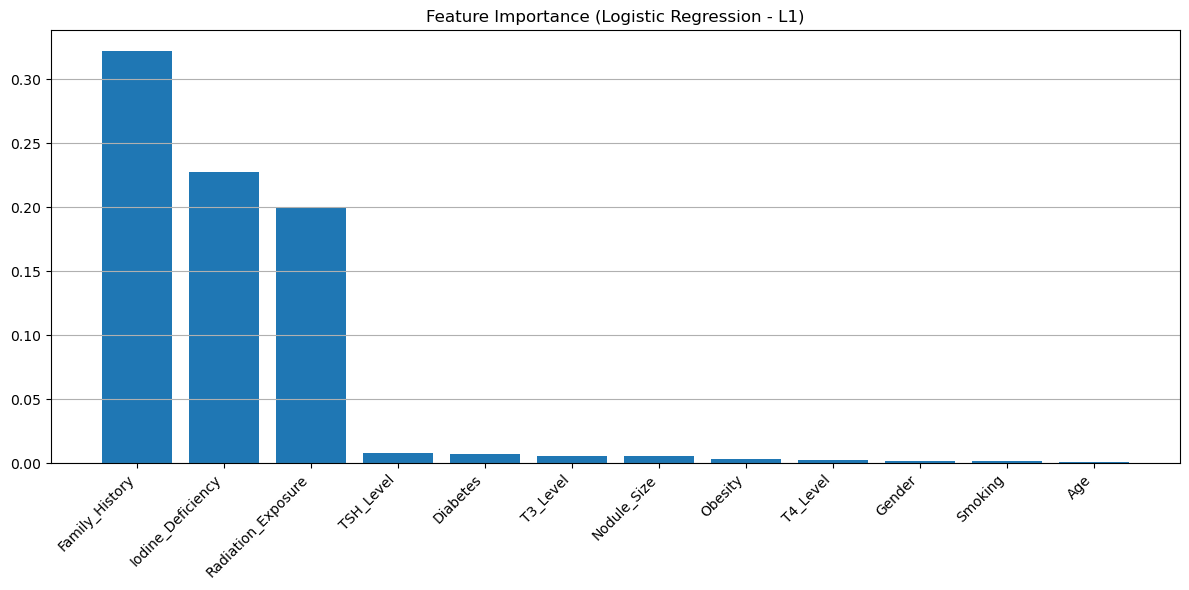

               Feature  Importance
2       Family_History    0.321986
4    Iodine_Deficiency    0.227187
3   Radiation_Exposure    0.199058
8            TSH_Level    0.008092
7             Diabetes    0.007242
9             T3_Level    0.005602
11         Nodule_Size    0.005424
6              Obesity    0.002894
10            T4_Level    0.002639
1               Gender    0.001890


In [3]:
#Feature Importance - Logistic Regression
import pandas as pd #Εισαγωγή Pandas ως κύρια βιβλιοθήκη για διαχείριση/ανάλυση πινάκων δεδομένων (DataFrames)
import matplotlib.pyplot as plt  #Εισαγωγή matplotlib για οπτικοποίηση των αποτελεσμάτων.
from sklearn.linear_model import LogisticRegression  #Εισαγωγή Logistic Regression από scikit-learn.
from sklearn.preprocessing import StandardScaler    #Εισαγωγή StandardScaler για κανονικοποίηση χαρακτηριστικών.
 
# Βήμα 1: Φόρτωση του dataset
df = pd.read_excel("Dataset_Cleaned.xlsx")  #Φόρτωση επιμελημένου αρχείου δεδομένων (μετά τον καθαρισμό) από Excel.
df = df.drop(columns=["Thyroid_Cancer_Risk"]) #Διαγραφή του πεδίου Thyroid_Cancer_Risk λογω classification 

# Βήμα 2: Διαχωρισμός χαρακτηριστικών και στόχου θέτοντας το πεδίο diagnosis ως πεδίο-στόχο. 
X = df.drop(columns=["Diagnosis"]) #Ορισμός μεταβλητών εισόδου (X), όλες οι στήλες εκτός της Diagnosis.
y = df["Diagnosis"] # Ορισμός του Diagnosis ως το πεδίο-στόχος (y).
 
# Βήμα 3: Κανονικοποίηση (Απαραίτητη για Logistic Regression)
# Η κανονικοποίηση είναι απαραίτητη για Logistic Regression
# καθώς η κλίμακα των χαρακτηριστικών επηρεάζει άμεσα τα μεγέθη των συντελεστών.

scaler = StandardScaler() # Αρχικοποίηση κανονικοποιητή (μηδενικός μέσος, μοναδιαία διασπορά).
X_scaled = scaler.fit_transform(X) #Αξιολόγηση όλων των παραγόντων του πεδίου στόχου για κατανομή με βάση την σημαντικότητα τους.
 
# Βήμα 4: Εκπαίδευση Logistic Regression με L1 penalty
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42) 
# Αρχικοποίηση Logistic Regression με:
# L1 regularization (Lasso), που εκμηδενίζει συντελεστές λιγότερο σημαντικών χαρακτηριστικών.
# Solver κατάλληλος για L1.
logreg.fit(X_scaled, y)  # Εκπαίδευση του μοντέλου με τα κανονικοποιημένα δεδομένα.
 
# Βήμα 5: Εξαγωγή απόλυτων τιμών των συντελεστών ως "σημαντικότητα"
coefficients = abs(logreg.coef_[0]) # Χρήση  απόλυτων τιμών συντελεστών ως μέτρο "σημαντικότητας".
feature_names = X.columns # Ανάκτηση ονομάτων χαρακτηριστικών για ερμηνεία.
 
importance_df = pd.DataFrame({  # Δημιουργία πίνακα με χαρακτηριστικά και τις αντίστοιχες σημαντικότητες.
    "Feature": feature_names,
    "Importance": coefficients
}).sort_values(by="Importance", ascending=False) # Ταξινόμηση κατά φθίνουσα σειρά σημαντικότητας.
 
# Βήμα 6: Οπτικοποίηση
plt.figure(figsize=(12, 6))  # Δημιουργία καμβά γραφήματος με διαστάσεις 12x6.
plt.bar(importance_df["Feature"], importance_df["Importance"])  #Σχεδίαση ράβδο-διαγράμματος σημαντικότητας.
plt.xticks(rotation=45, ha="right")    # Περιστροφή ετικετών άξονα x για ευαναγνωσία.
plt.title("Feature Importance (Logistic Regression - L1)")  # Προσθήκη τίτλου γραφήματος.
plt.tight_layout()    # Βελτιστοποίηση διάταξης για αποφυγή επικαλύψεων.
plt.grid(axis="y")    # Ενεργοποίηση οριζόντιου πλέγματος για διευκόλυνση σύγκρισης.
plt.show()   # Εμφάνιση γραφήματος.
 
# Εκτύπωση των top 10 χαρακτηριστικών.
print(importance_df.head(10))
 
 

## Σύγκριση Σημαντικότητας Χαρακτηριστικών: Logistic Regression (L1) vs Random Forest

Σε αυτό το σημείο συγκρίνουμε δύο διαφορετικές μεθόδους για την αξιολόγηση της σημαντικότητας των χαρακτηριστικών: **Logistic Regression με L1 Regularization** και **Random Forest Classifier**. Παρόλο που και οι δύο χρησιμοποιούνται ευρέως στην επίβλεψη ταξινόμησης, βασίζονται σε διαφορετική φιλοσοφία υπολογισμού της σημασίας κάθε χαρακτηριστικού.

---

### Logistic Regression (L1 Regularization)
Η **Λογιστική Παλινδρόμηση με L1 Regularization (Lasso)** προσθέτει ποινή απόλυτης τιμής (L1) στους συντελεστές, οδηγώντας πολλούς από αυτούς σε **μηδενισμό**. Αυτό καθιστά το μοντέλο ιδιαίτερα χρήσιμο για **επιλογή χαρακτηριστικών (feature selection)**.

**Πλεονεκτήματα:**
- Ερμηνεύσιμη (γραμμική) μέθοδος: ευκολία κατανόησης του τρόπου που επηρεάζει κάθε χαρακτηριστικό το αποτέλεσμα.
- Το L1 προωθεί τη sparsity: μειώνει τη διάσταση επιλέγοντας μόνο τα σημαντικά χαρακτηριστικά.
- Χρήσιμη για high-dimensional δεδομένα.

**Μειονεκτήματα:**
- Υποθέτει γραμμική συσχέτιση μεταξύ χαρακτηριστικών και εξαρτημένης μεταβλητής.
- Δεν συλλαμβάνει μη-γραμμικές σχέσεις.
- Ευαίσθητη στην πολυσυγγραμμικότητα.

**Αποτελέσματα στο γράφημα:**
- Τα σημαντικότερα χαρακτηριστικά: `Family_History`, `Iodine_Deficiency`, `Radiation_Exposure`.
- Τα περισσότερα ιατρικά επίπεδα (π.χ. `TSH`, `T3`, `T4`) εμφανίζονται ως χαμηλής σημαντικότητας.
- Πολύ "επιθετική" επιλογή χαρακτηριστικών με σχεδόν μηδενικές τιμές για αρκετά attributes.

---

### Random Forest Classifier

Το Random Forest είναι ένα ensemble μοντέλο που βασίζεται σε πολλαπλά δέντρα απόφασης και μετρά τη σημασία κάθε χαρακτηριστικού με βάση τη **μείωση του Gini Impurity** ή του **Information Gain** σε split nodes.

**Πλεονεκτήματα:**
- Ανιχνεύει μη-γραμμικές σχέσεις και αλληλεπιδράσεις μεταξύ χαρακτηριστικών.
- Ανθεκτικό σε υπερπροσαρμογή λόγω του ensemble χαρακτήρα.
- Δεν απαιτεί προκαθορισμένο καθαρισμό ή επιλογή χαρακτηριστικών.

**Μειονεκτήματα:**
- Περισσότερο «μαύρο κουτί» – δυσκολία ερμηνείας.
- Μπορεί να παρουσιάσει bias υπέρ των χαρακτηριστικών με περισσότερες διακριτές τιμές (σε κάποια versions).

**Αποτελέσματα στο γράφημα:**
- Τα σημαντικότερα χαρακτηριστικά: `TSH_Level`, `T4_Level`, `Nodule_Size`, `T3_Level`, `Age`.
- Τα επίπεδα θυρεοειδικών ορμονών παίζουν καθοριστικό ρόλο, σε αντίθεση με τη Logistic Regression.
- `Family_History`, `Iodine_Deficiency`, και `Radiation_Exposure` εμφανίζονται με χαμηλότερη σημασία.

---

###  Συμπεράσματα

1. **Διαφορετική προσέγγιση, διαφορετικά ευρήματα:**
   - Η **Logistic Regression (L1)** υπογραμμίζει την κλινική σημασία κληρονομικότητας και περιβαλλοντικών παραγόντων.
   - Το **Random Forest** εστιάζει κυρίως σε **ιατρικούς βιοδείκτες** (TSH, T3, T4) και ανατομικές παραμέτρους όπως το μέγεθος όζου.

2. **Συμπληρωματικότητα:**
   - Τα αποτελέσματα δείχνουν ότι η χρήση **συνδυασμένων μοντέλων ή εναλλακτικών μεθόδων feature selection** μπορεί να αποκαλύψει διαφορετικές πτυχές των δεδομένων.
   - Στο πλαίσιο ιατρικών εφαρμογών, η χρήση **Logistic Regression για επιλογή χαρακτηριστικών** και **Random Forest για ταξινόμηση** είναι μια καλή στρατηγική.

3. **Κλινική αξία:**
   - Η παρουσία του `Family_History` και της `Iodine_Deficiency` ως κυρίαρχα χαρακτηριστικά στη Logistic Regression αναδεικνύει τη σημασία του οικογενειακού ιστορικού και της διατροφής.
   - Οι θυρεοειδικές παράμετροι στη Random Forest ενισχύουν την αξία της **εργαστηριακής διάγνωσης**.

---




In [6]:
!pip install shap -q # Η παράμετρος -q (quiet mode) καταστέλλει τα ενημερωτικά μηνύματα της εγκατάστασης.



Top-10 χαρακτηριστικά βάσει Mean |SHAP| :

           Feature  Mean_|SHAP|
    Family_History     0.306342
 Iodine_Deficiency     0.215184
Radiation_Exposure     0.161690
         TSH_Level     0.007008
          Diabetes     0.005902
          T3_Level     0.004863
       Nodule_Size     0.004713
           Obesity     0.002880
          T4_Level     0.002289
            Gender     0.001837


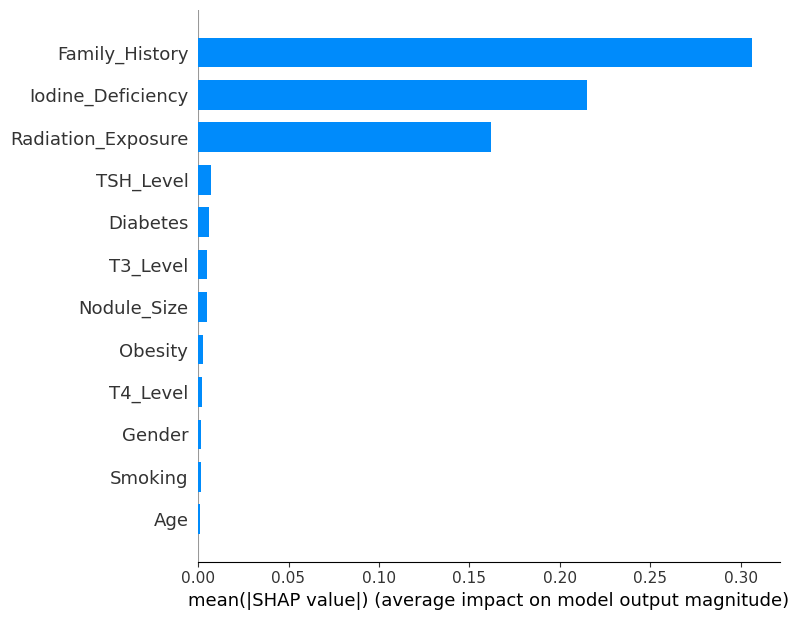

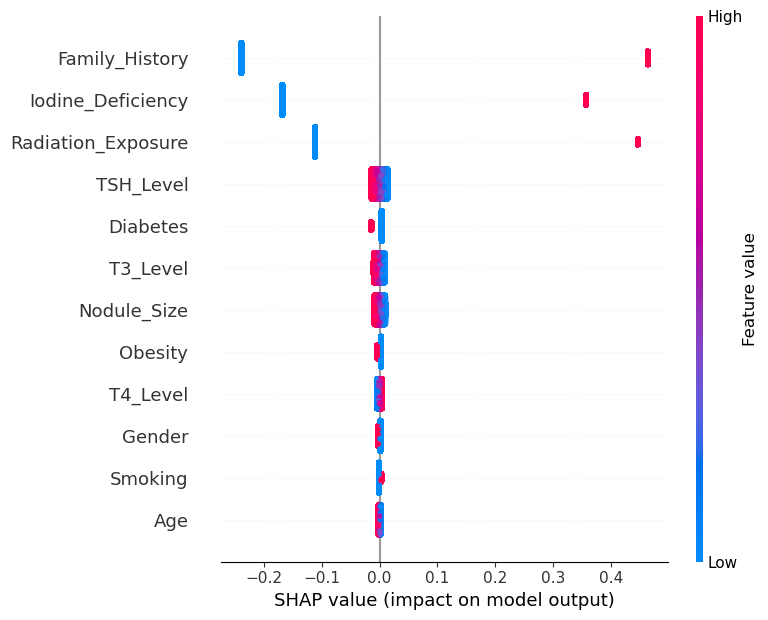

In [10]:
# 7) SHAP VALUES (Shapley Additive Explanations) για το εκπαιδευμένο Logistic Regression

import numpy as np   #Εισαγωγή της βιβλιοθήκης NumPy για υπολογισμούς πινάκων και στατιστικών μετρήσεων 
import shap          #Εισαγωγή της βιβλιοθήκης SHAP (Shapley Additive Explanations) για ερμηνεία των προβλέψεων του μοντέλου.
import pandas as pd  #Εισαγωγή Pandas ως κύρια βιβλιοθήκη για διαχείριση/ανάλυση πινάκων δεδομένων (DataFrames)

# Μετατροπή του πίνακα χαρακτηριστικών X_scaled (μετά την κανονικοποίηση) σε DataFrame, διατηρώντας τα αρχικά ονόματα των χαρακτηριστικών.
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

#Δημιουργία αντικειμένου LinearExplainer το οποίο υπολογίζει τις συνεισφορές (Shapley values) κάθε χαρακτηριστικού
#για το εκπαιδευμένο μοντέλο Logistic Regression.
explainer = shap.LinearExplainer(logreg, X_scaled_df)
#Εξαγωγή των τιμών SHAP (Shapley values) για κάθε παρατήρηση και κάθε χαρακτηριστικό του συνόλου δεδομένων.
#που υποδεικνύουν το μέγεθος και την κατεύθυνση της επίδρασης κάθε μεταβλητής στην πρόβλεψη.
shap_values = explainer.shap_values(X_scaled_df)

#Δημιουργία πίνακα (DataFrame) που περιέχει τα χαρακτηριστικά και τη μέση τιμή SHAP.
#Ταξινόμηση κατά φθίνουσα σειρά ώστε να αναδειχθούν τα πιο σημαντικά χαρακτηριστικά.
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
shap_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean_|SHAP|": mean_abs_shap
}).sort_values(by="Mean_|SHAP|", ascending=False)

#Εμφάνιση των 10 χαρακτηριστικών με τη μεγαλύτερη μέση απόλυτη τιμή SHAP, δηλαδή τη μεγαλύτερη συνολική συμβολή στην πρόβλεψη.
print("\nTop-10 χαρακτηριστικά βάσει Mean |SHAP| :")
print() #κενή print--> για κενή σειρά στο ενδιάμεσο.
print(shap_importance_df.head(10).to_string(index=False))

# Δημιουργία ραβδογράμματος (barplot) που απεικονίζει τη μέση επίδραση κάθε χαρακτηριστικού στο τελικό αποτέλεσμα πρόγνωσης.
shap.summary_plot(shap_values, X_scaled_df, plot_type="bar", show=True)
# Δημιουργία συνοπτικού διαγράμματος (summary plot) που παρουσιάζει την κατεύθυνση και το εύρος επιρροής κάθε μεταβλητής.
shap.summary_plot(shap_values, X_scaled_df, show=True)
